In [ ]:
!pip install rasterio

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import matplotlib as mpl
from matplotlib import cm, colors
import sqlite3

In [ ]:
conn = sqlite3.connect("compiled_gcbm_output.db")

### NPP, NEP and NBP

In [ ]:
query = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS NPP_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS NEP_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS NBP_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        WHERE i.indicator = 'NPP' and j.indicator = 'NEP' and k.indicator='NBP'
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [ ]:
df = pd.read_sql_query(query, conn)
df.head()

,year,NPP_mt,NEP_mt,NBP_mt
0,2010,242.051980,106.773284,106.773284
1,2011,49.449230,-72.334325,-72.334325
2,2012,38.588949,-60.693467,-60.693467
3,2013,42.914482,-43.052486,-43.052486
4,2014,45.171823,-31.517218,-31.517218


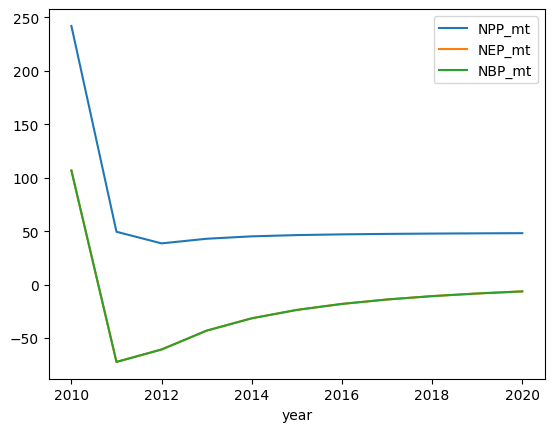

In [ ]:
ax = df.plot.line("year") # because there was no disturbance layer, NEP = NBP

### Spatial time lapse of NEP & NBP

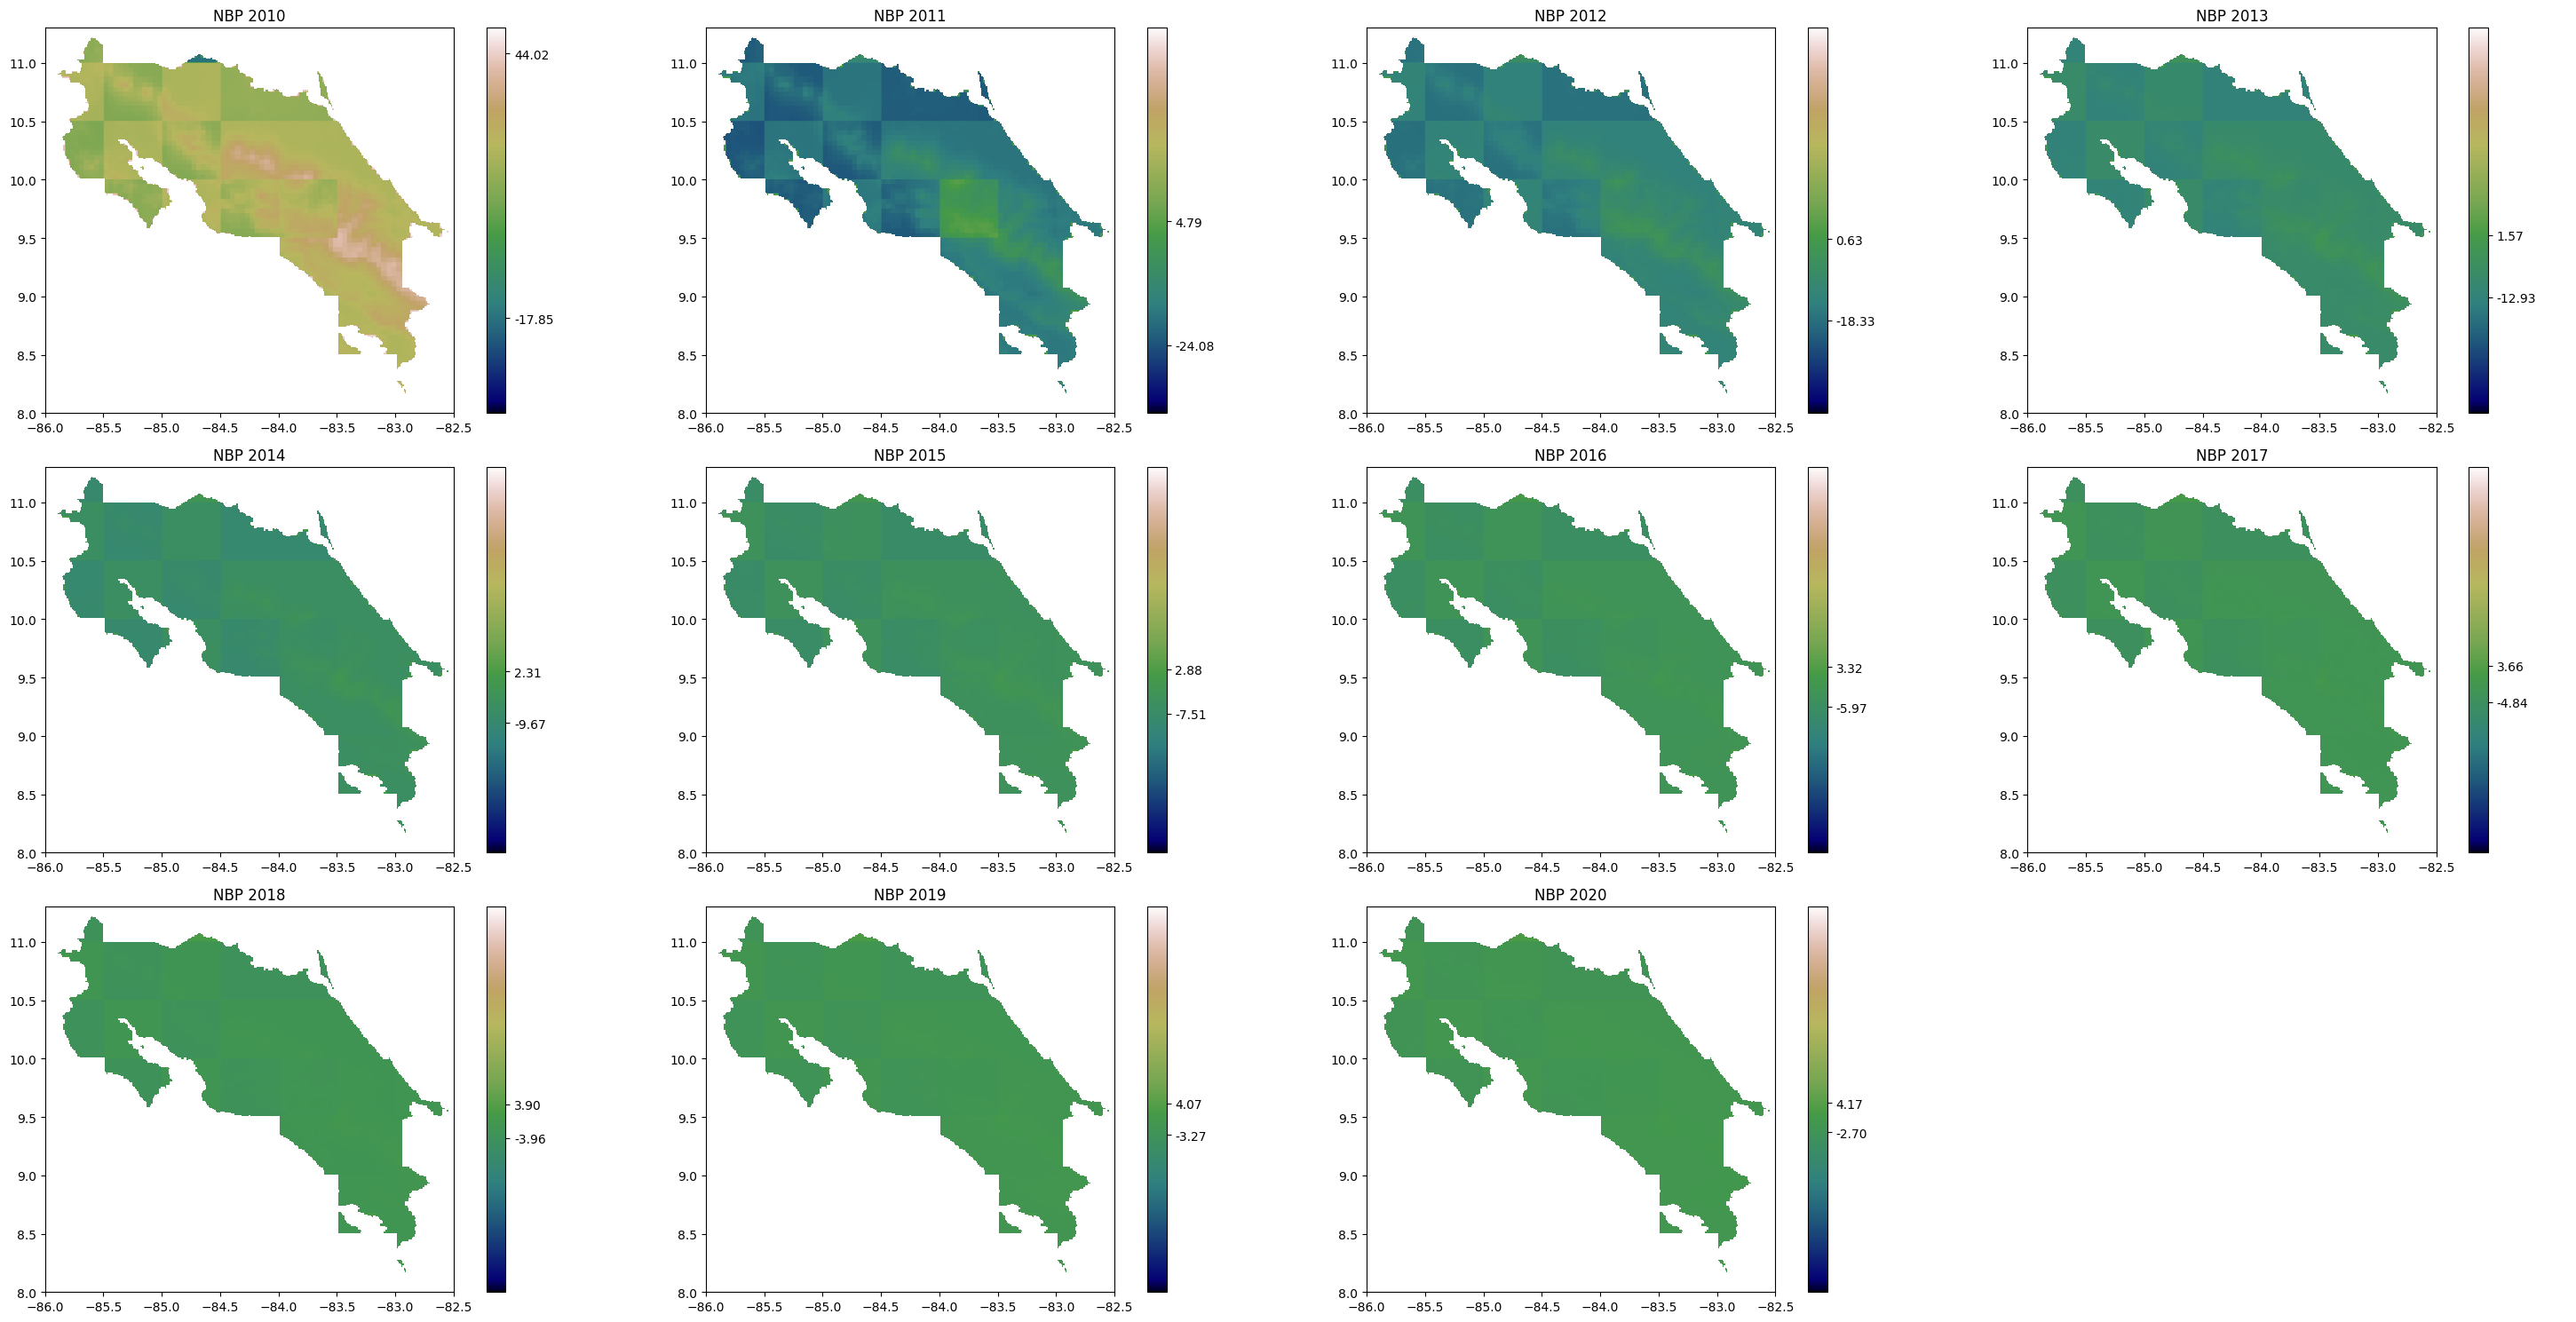

In [ ]:
mpl.rc('image', cmap='gist_earth')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=-40, vmax=50)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'NBP_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'NBP {year}')
        show(arr, transform=src.transform, ax=ax, cmap='gist_earth', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='gist_earth')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Total Biomass C

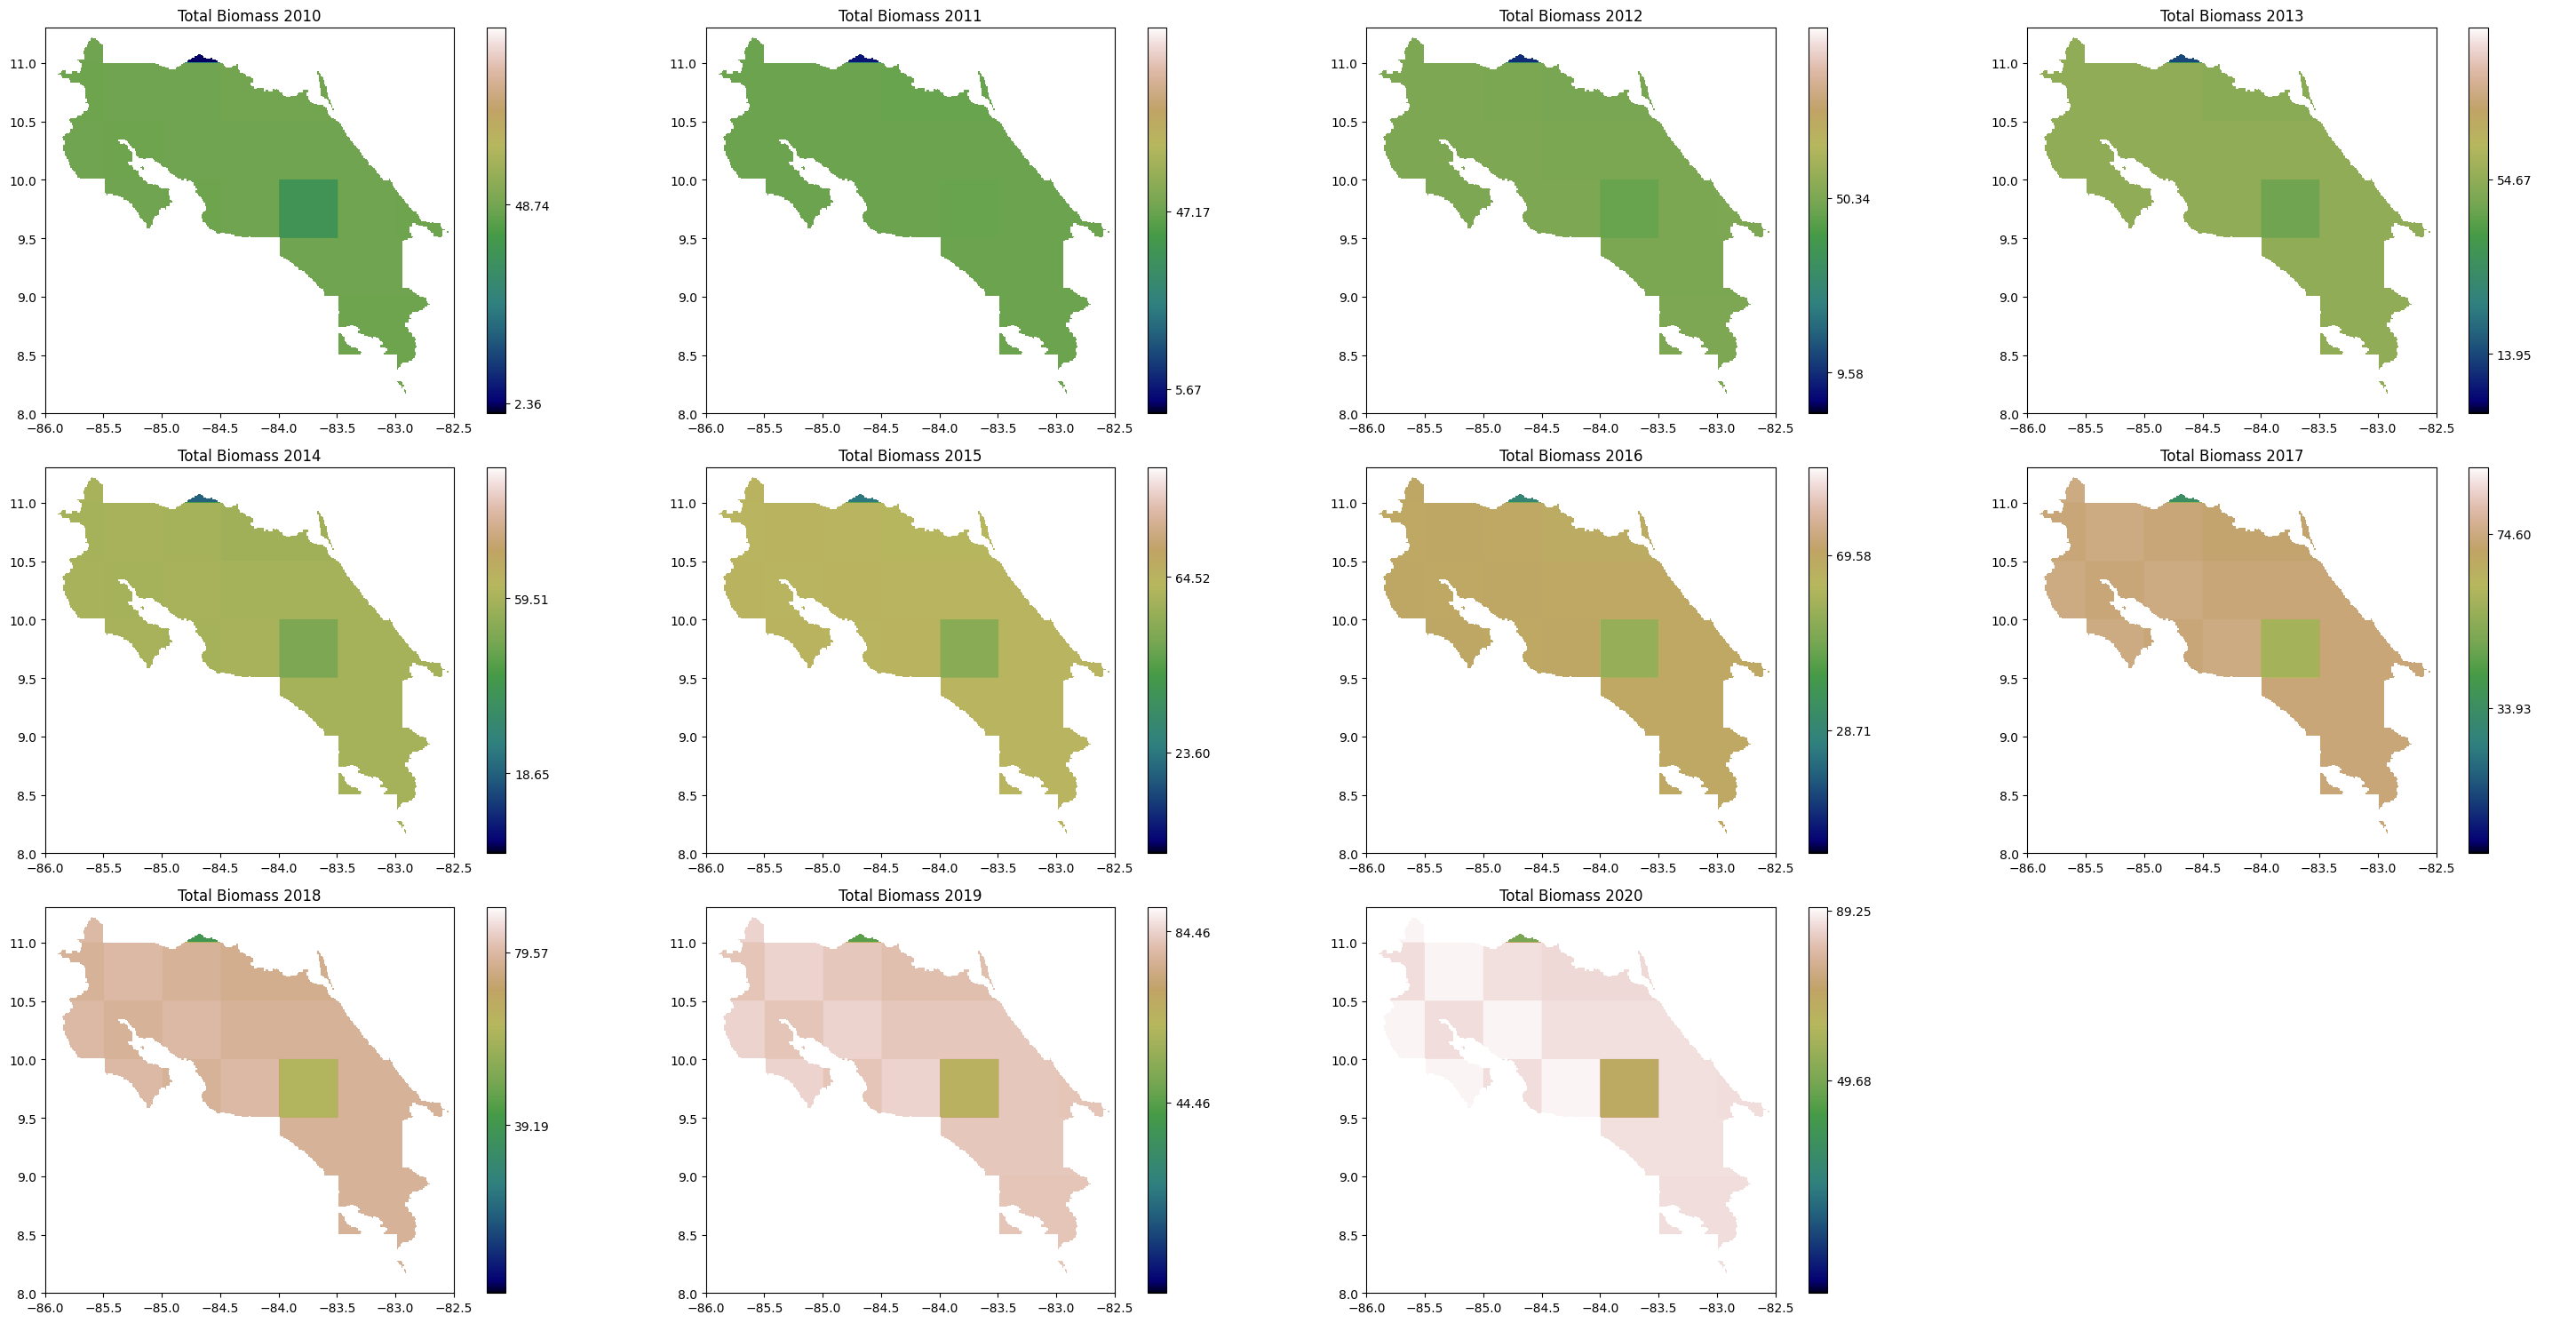

In [14]:
mpl.rc('image', cmap='gist_earth')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=0, vmax=90)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'Total_Biomass_C_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'Total Biomass {year}')
        show(arr, transform=src.transform, ax=ax, cmap='gist_earth', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='gist_earth')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Total CO2 Emissions

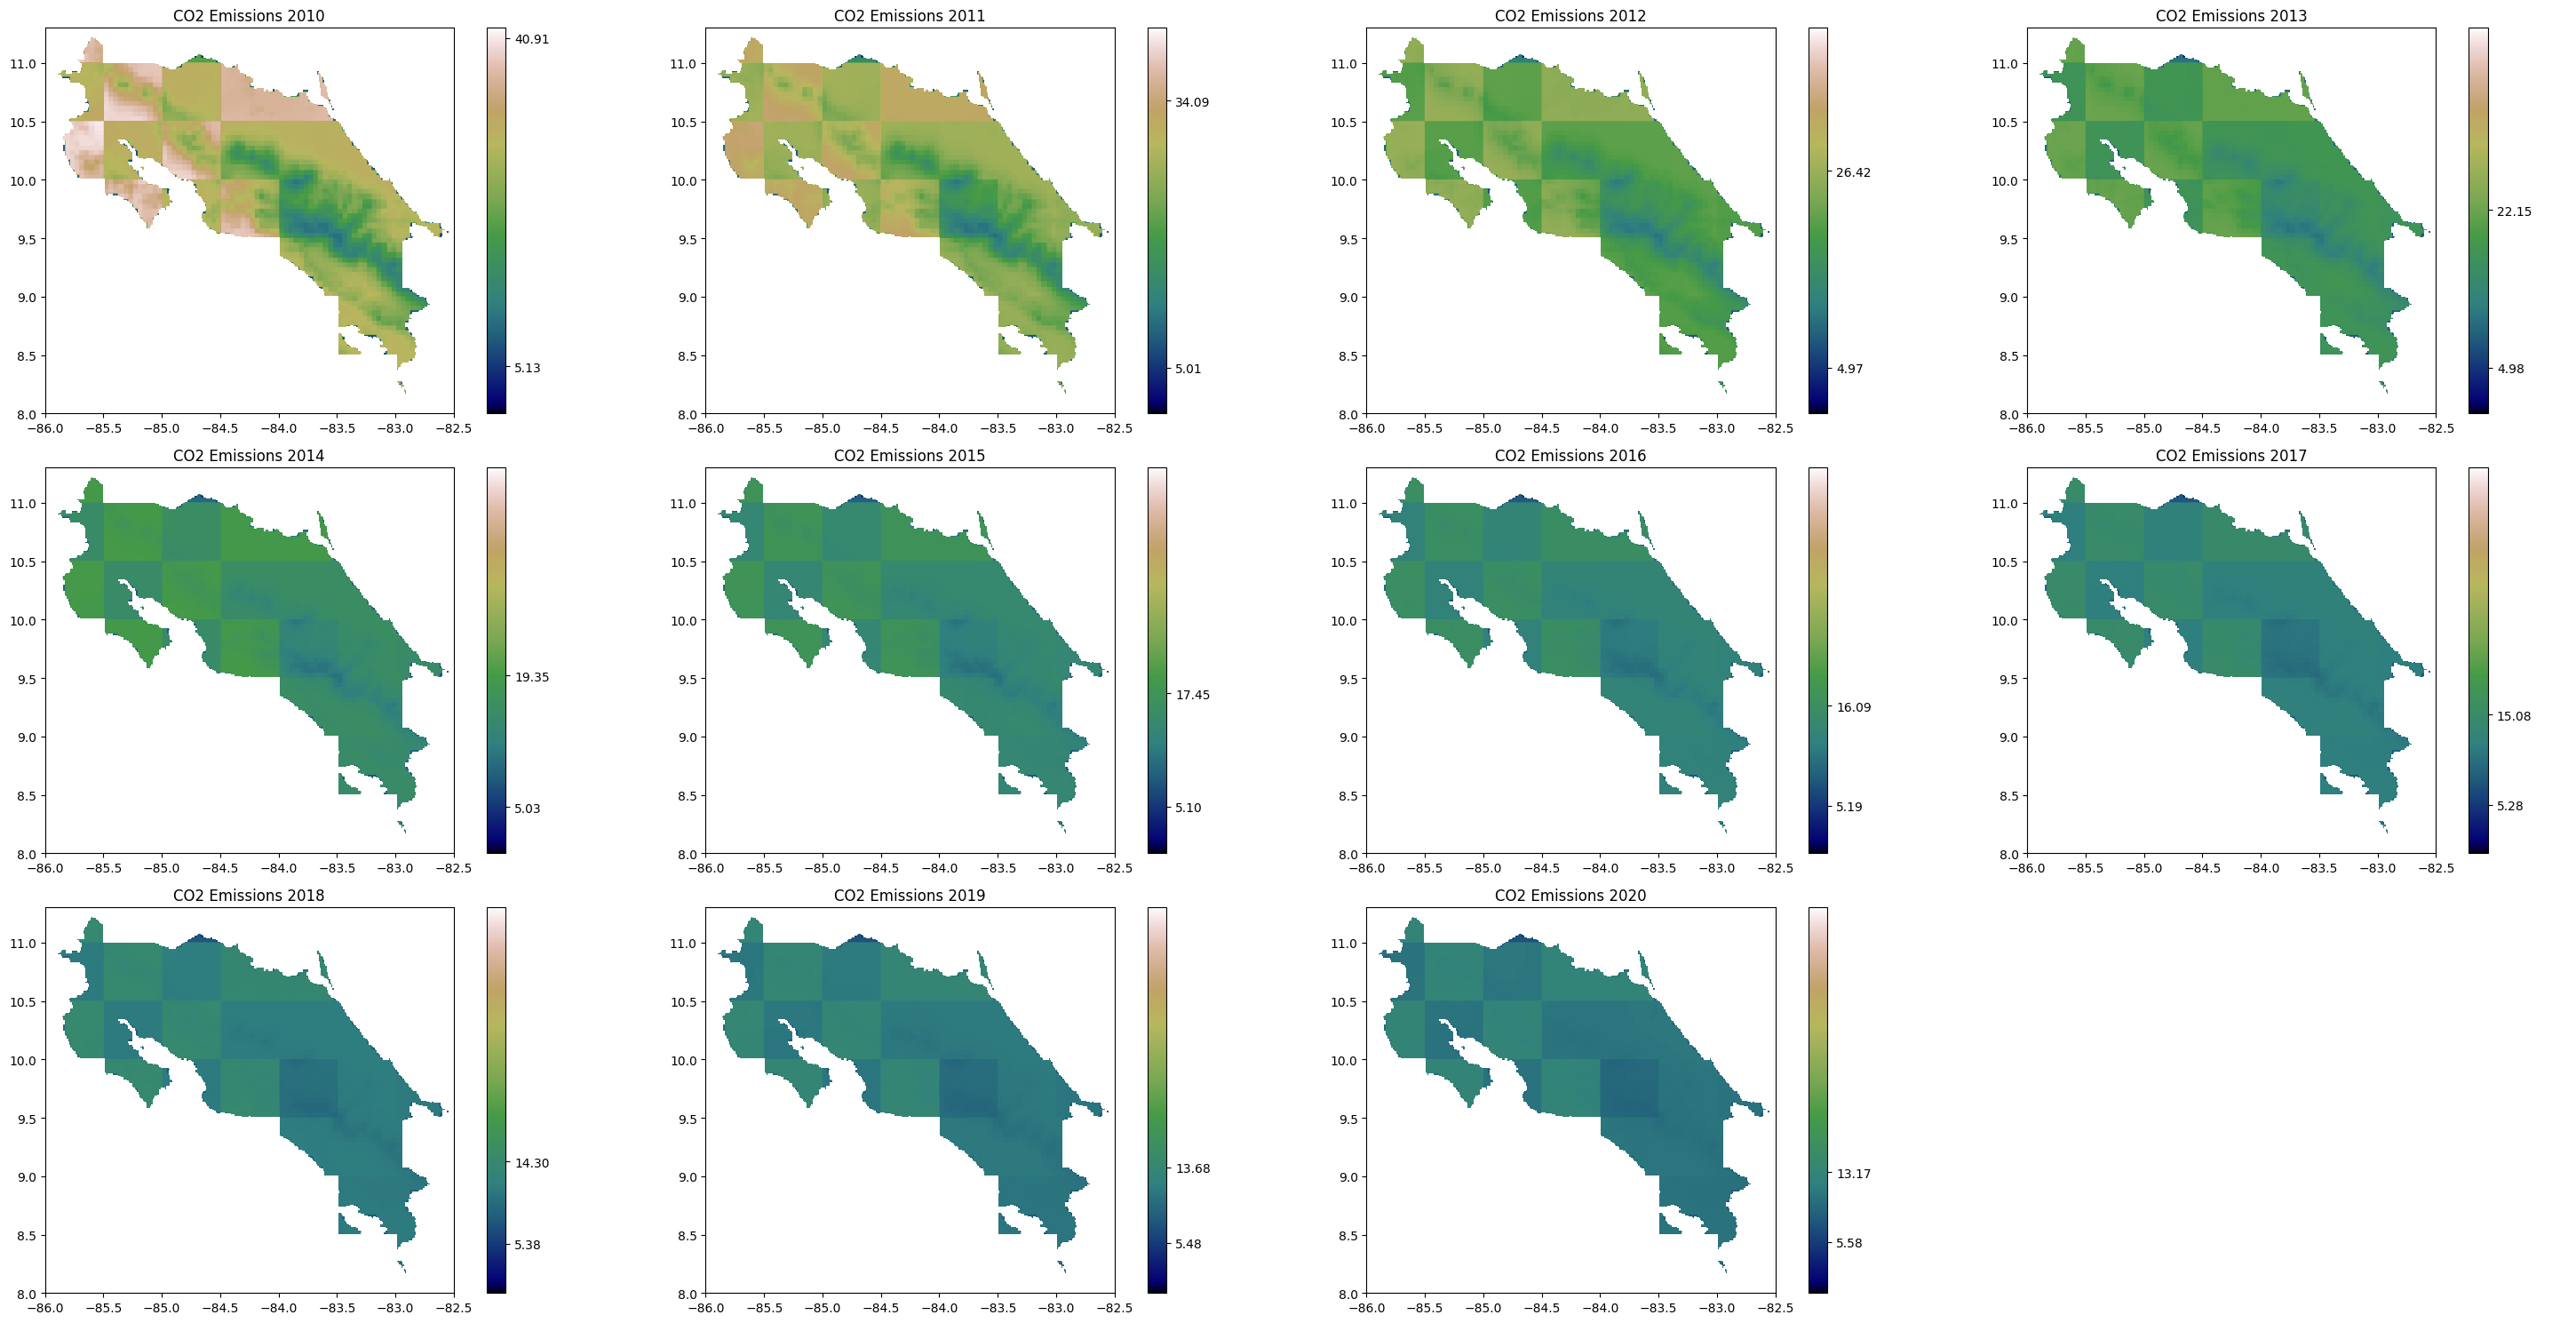

In [18]:
mpl.rc('image', cmap='gist_earth')

# Base directory containing the files
base_dir = '/content/spatial/'

# Set up the figure and axes for the subplots
fig, axs = plt.subplots(3, 4, figsize=(30, 15))  # 3 rows, 4 columns
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Define normalization for consistent color scaling across all maps
uniform_norm = colors.Normalize(vmin=0, vmax=42)

# Loop through each year from 2010 to 2020
for index, year in enumerate(range(2010, 2021)):
    file_path = os.path.join(base_dir, f'Total_CO2_Emissions_{year}.tif')

    # Open the raster file
    with rasterio.open(file_path) as src:
        # Read the first band
        arr = src.read(1)
        # Replace values below -40 with NaN
        arr = np.where(arr < -40, np.nan, arr)

        # Plotting on specified subplot axis
        ax = axs[index]
        ax.set_title(f'CO2 Emissions {year}')
        show(arr, transform=src.transform, ax=ax, cmap='gist_earth', norm=uniform_norm)  # Apply uniform normalization here

        # Get the min and max of the current array (ignoring NaN values)
        min_val, max_val = np.nanmin(arr), np.nanmax(arr)

        # Create colorbar with the uniform scale -40 to 50
        mappable = cm.ScalarMappable(norm=uniform_norm, cmap='gist_earth')
        cbar = fig.colorbar(mappable, ax=ax)

        # Set the colorbar to display only the actual min and max values
        cbar.set_ticks([min_val, max_val])
        cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Hide unused axes
for ax in axs[index + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
